##### Dataset link: https://www.kaggle.com/datasets/bandhansingh/banglore-house-price-data

### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv("./banglore_real_estate_data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df1 = df.drop(columns=['area_type','society','availability', 'balcony'], axis="columns")
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [5]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df2 = df1.dropna()
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [7]:
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

### Feature Engineering

In [8]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
def get_size(x):
    return float(x.split(" ")[0])

df2["BHK"] = df2["size"].apply(get_size)
df2

C:\Users\Veera\AppData\Local\Temp\ipykernel_9820\1346782990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["BHK"] = df2["size"].apply(get_size)


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3.0
4,Kothanur,2 BHK,1200,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4.0


In [10]:
df2["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [11]:
def is_float(x):
    try:
        float(x)
        return True
    except:
        return False

In [12]:
df2[~df2["total_sqft"].apply(is_float)].head(20)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4.0
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4.0
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2.0
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2.0
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2.0
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1.0
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2.0
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9.0
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2.0
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4.0


 Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. We will just drop such corner cases to keep things simple

In [13]:
def get_avg(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+ float(tokens[1]))/2
    
    try:
        return float(x)
    except:
        return None


In [14]:
df3 = df2.copy()
df3["total_sqft"] = df2["total_sqft"].apply(get_avg)
df3

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0


In [15]:
def change_price(x):
    return float(x)

In [16]:
df3["price"] = df3["price"].apply( change_price)

In [17]:
### create a new column "price per sq.ft"
### price_per_sqft = (price*100000)/sqft


df3["price_per_sqft"] = (df3["price"]*100000 / (df3["total_sqft"]))
df3

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


In [18]:
df3["location"]  =df3["location"].apply(lambda x: x.strip())
locations = df3["location"].value_counts(ascending=False)
locations

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [19]:
other_loc = locations[locations<=10]
other_loc

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [20]:
### We group the locations whose repetetions is less than 10 as "other"

def check_loc_stats(x):
    if x in other_loc:
        return "other"
    else:
        return x
    

df3["location"] = df3["location"].apply(check_loc_stats)
df3.head(20)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2.0,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4.0,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4.0,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3.0,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6.0,36274.509804


#### Outlier removal using business logic (BHK and total_sqft)

Logic: 

if: (total_sqft)/BHK < 300, then it is an Outlier

else: not an outlier

In [21]:
outlier_df = df3[(df3['total_sqft']/df3["BHK"]) < 300]
outlier_df

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6.0,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8.0,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3.0,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7.0,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6.0,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5.0,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5.0,9043.927649


In [22]:
df3 = df3[(df3['total_sqft']/df3["BHK"]) >= 300]
df3

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4.0,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.336319


#### Outlier removal using std deviation and mean (price_per_sqft)

In [23]:
df3["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [24]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df3.groupby("location"):
        mean = np.mean(subdf["price_per_sqft"])
        std_dev = np.std(subdf["price_per_sqft"])

        ## checking validitiy
        reduced_df = subdf[
            (subdf["price_per_sqft"] > (mean - std_dev))
            & (subdf["price_per_sqft"] <= (mean + std_dev))
        ]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out


df4 = remove_pps_outlier(df3)
df4

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...,...
10236,other,2 BHK,1353.0,2.0,110.00,2.0,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1.0,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3.0,4439.583333
10239,other,2 BHK,1075.0,2.0,48.00,2.0,4465.116279


##### Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

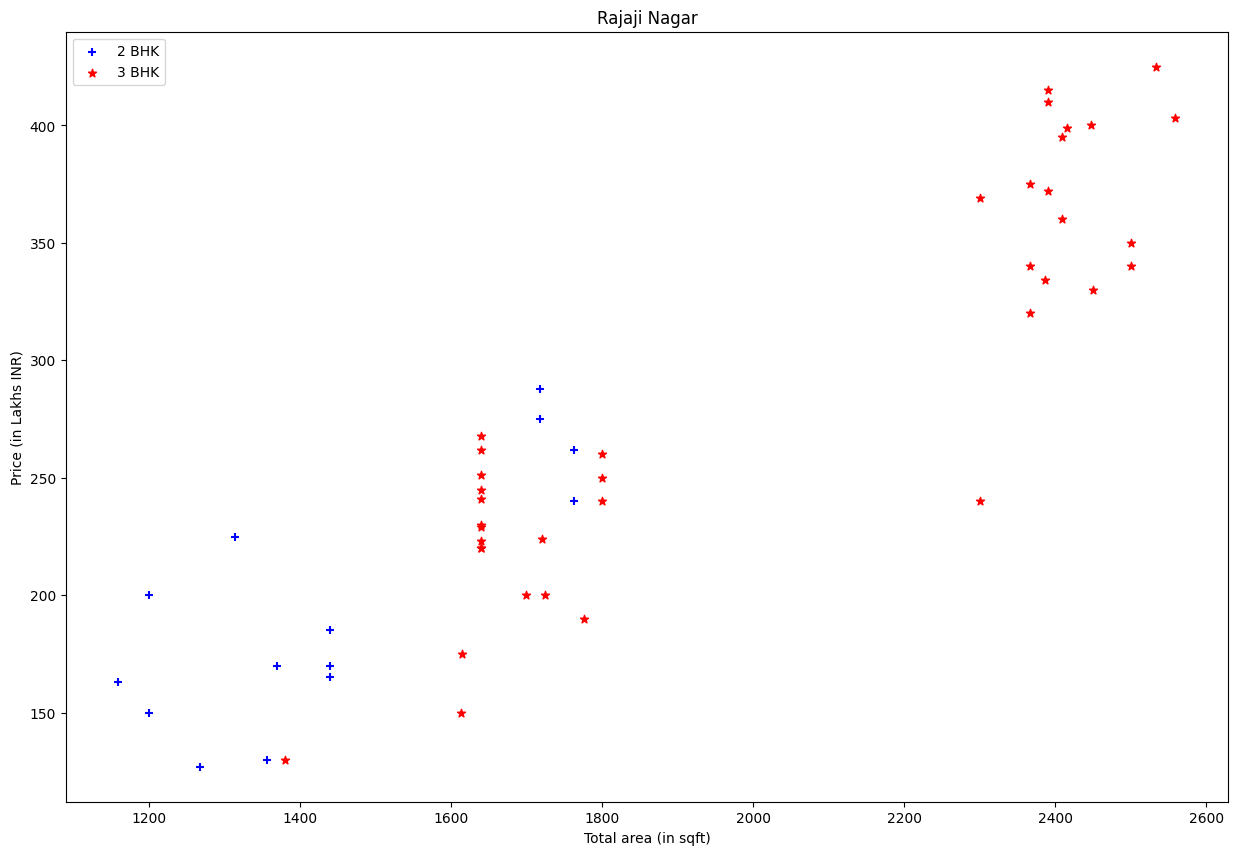

In [25]:
def plot_graph(df, loc):
    df_2BHK = df4[(df4["location"]==loc) & (df4["BHK"]==2)]
    df_3BHK = df4[(df4["location"]==loc) & (df4["BHK"]==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.title(loc)
    plt.scatter(df_2BHK["total_sqft"], df_2BHK["price"], marker="+", color="Blue", label = "2 BHK")
    plt.scatter(df_3BHK["total_sqft"], df_3BHK["price"], marker="*", color="Red", label = "3 BHK")
    plt.xlabel("Total area (in sqft)")
    plt.ylabel("Price (in Lakhs INR)")
    plt.legend()


plot_graph(df4,"Rajaji Nagar")



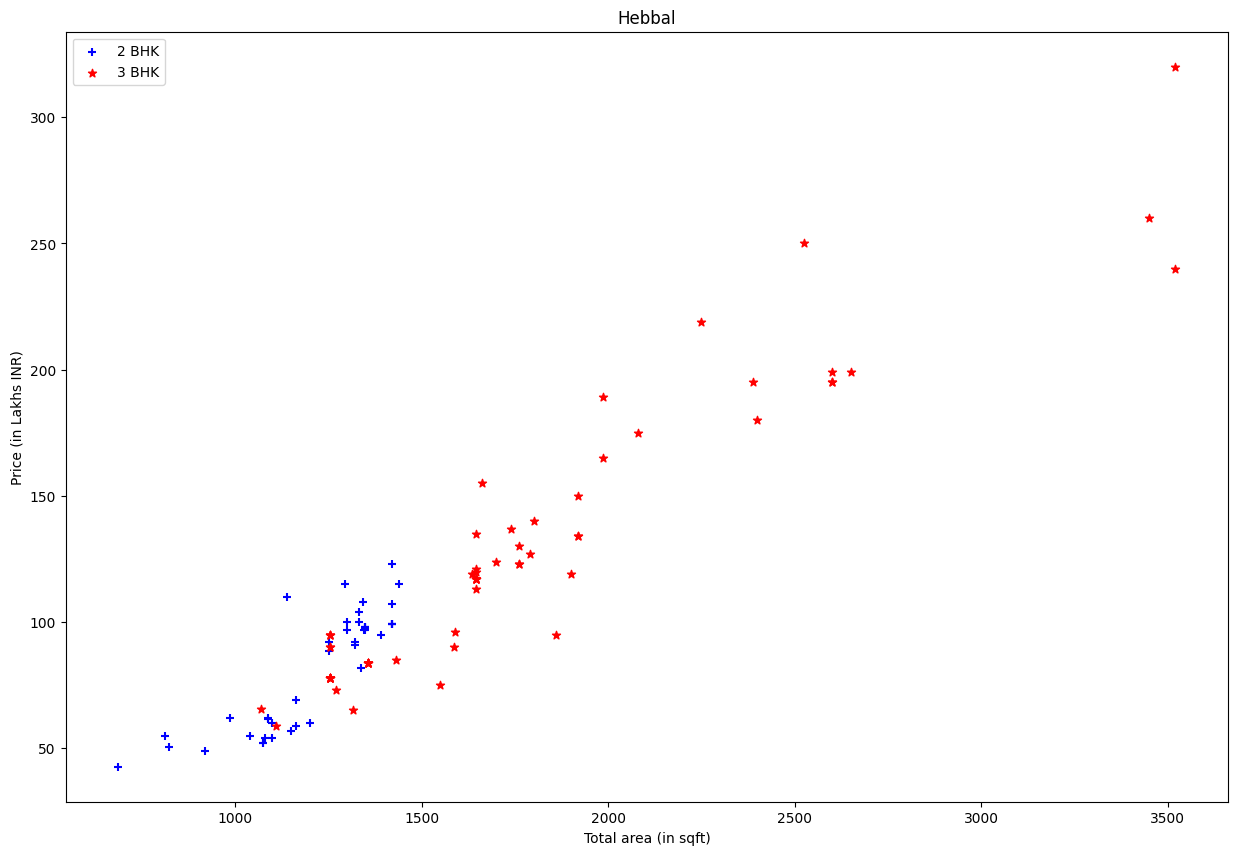

In [26]:
plot_graph(df4,"Hebbal")


Text(0, 0.5, 'No of counts')

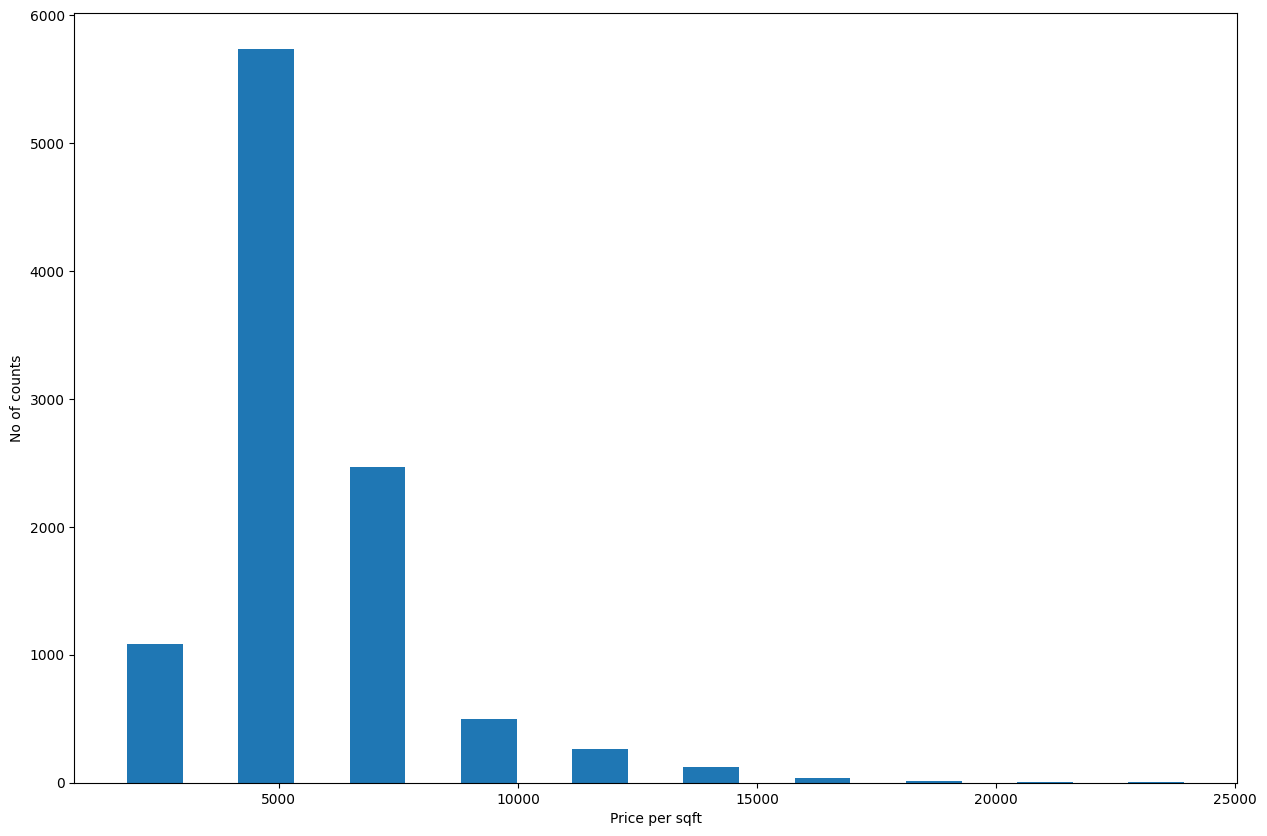

In [27]:
plt.hist(df4["price_per_sqft"],rwidth=0.5)
plt.xlabel("Price per sqft")
plt.ylabel("No of counts")

#### Outlier removal (no.of.bathrooms)

In [28]:
df4["bath"].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'No of counts')

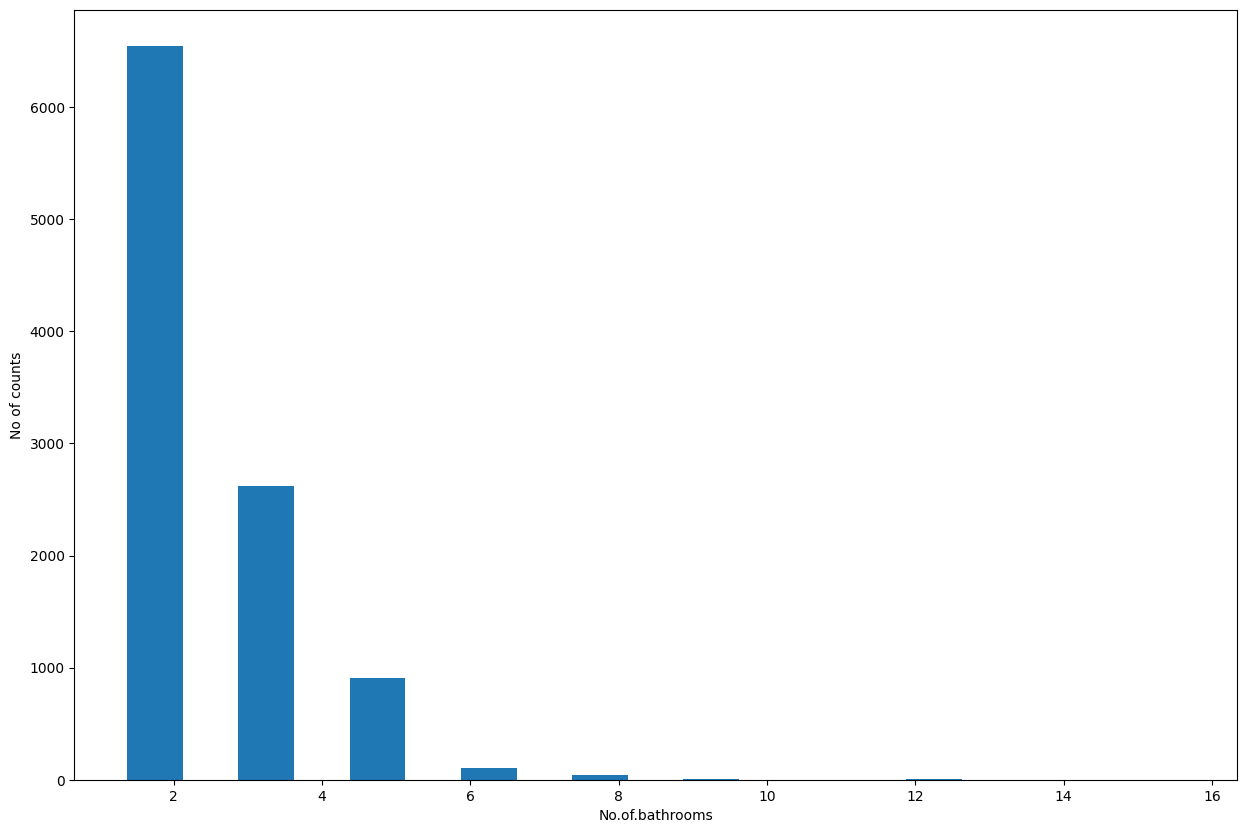

In [29]:
plt.hist(df4["bath"],rwidth=0.5)
plt.xlabel("No.of.bathrooms")
plt.ylabel("No of counts")

Logic: 

if: no.of.bathroom > bhk+2 --> Outlier

In [30]:
df4 = df4[df4["bath"]<=df4["BHK"]]
df4

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4.0,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3.0,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3.0,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3.0,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2.0,11983.805668
...,...,...,...,...,...,...,...
10235,other,2 BHK,1256.0,2.0,65.00,2.0,5175.159236
10236,other,2 BHK,1353.0,2.0,110.00,2.0,8130.081301
10237,other,1 Bedroom,812.0,1.0,26.00,1.0,3201.970443
10238,other,3 BHK,1440.0,2.0,63.93,3.0,4439.583333


In [31]:
df4 = df4.drop(columns=["price_per_sqft", "size"], axis="columns")
df4

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.00,4.0
1,1st Block Jayanagar,1630.0,3.0,194.00,3.0
2,1st Block Jayanagar,1875.0,2.0,235.00,3.0
3,1st Block Jayanagar,1200.0,2.0,130.00,3.0
4,1st Block Jayanagar,1235.0,2.0,148.00,2.0
...,...,...,...,...,...
10235,other,1256.0,2.0,65.00,2.0
10236,other,1353.0,2.0,110.00,2.0
10237,other,812.0,1.0,26.00,1.0
10238,other,1440.0,2.0,63.93,3.0


#### One hot encodings

In dummy variable trap, we drop "other" column


In [32]:
dummies_loc = pd.get_dummies(df4["location"], dtype="int")
dummies_loc

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
dummies_loc = dummies_loc.drop(columns=["other"], axis= "columns")
dummies_loc

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
final_df = pd.concat([df4.drop(columns=["location"], axis="columns"), dummies_loc], axis='columns')
final_df

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.00,4.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.00,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.00,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.00,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.00,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,1256.0,2.0,65.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10236,1353.0,2.0,110.00,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,812.0,1.0,26.00,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1440.0,2.0,63.93,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
X = final_df.drop(columns=["price"], axis="columns")
Y = final_df["price"]

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression


In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, shuffle=True, train_size=0.8)

In [38]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.8056762527147125

Other models we can try:

1.Lasso

2.SVM

3.Decision Tree

Implementing GridSearchCV

In [44]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit


In [47]:
def find_best_model(x, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {"fit_intercept": [True, False]},
        },
        "lasso": {
            "model": Lasso(),
            "params": {"alpha": [1, 2], "selection": ["random", "cyclic"]},
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["mse", "friedman_mse"],
                "splitter": ["best", "random"],
            },
        },
        
    }

    scores = []
    cv = ShuffleSplit(n_splits=10, random_state=42, train_size=0.75)

    for algo_name, config in algos.items():
        gs = GridSearchCV(
            config["model"], config["params"], cv=cv, return_train_score=False
        )
        gs.fit(x, y)
        print("*"*25)
        print("Training completed for model: "+ algo_name)
        print("*"*25)
        scores.append(
            {
                "model": algo_name,
                "best_score": gs.best_score_,
                "best_params": gs.best_params_,
            }
        )
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

result_df = find_best_model(X, Y)
result_df

*************************
Training completed for model: linear_regression
*************************
*************************
Training completed for model: lasso
*************************
*************************
Training completed for model: decision_tree
*************************


c:\Users\Veera\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Veera\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Veera\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Veera\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

,model,best_score,best_params
0,linear_regression,0.765109,{'fit_intercept': True}
1,lasso,0.616769,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.638072,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [48]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return model.predict([x])[0]

In [50]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

In [49]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))